In [ ]:
# prepojenie na google drive, kde si ulozime dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# importovanie kniznic pre pracu s datami
import numpy as np
import pandas as pd

In [ ]:
import unicodedata

# načítanie súboru, problém -> spracovanie chýb pri špeciálnych symboloch
DATA_PATH = '/Users/A200417555/Desktop/vucap/uloha3/SpotifySongs2023.csv'

def clean_text(text):
    """
    Funkcia na čistenie textu - odstráni nežiaduce znaky a normalizuje text.
    Je to lepsi error handling, kedze sa to da pouzit aj na numericke stlpce.
    """
    if pd.isna(text):
        return text
    
    text = str(text)
    
    # normalizácia unicode znakov
    text = unicodedata.normalize('NFKD', text)
    
    # definovanie povolených znakov
    allowed_chars = set(
        'abcdefghijklmnopqrstuvwxyz'
        'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
        '0123456789'
        ' .,;:!?()[]{}@#$%^&*+-=_/\\|<>'
        "'\""
    )
    
    # ponechanie len povolených znakov
    text = ''.join(c for c in text if c in allowed_chars)
    
    # odstránenie nadbytočných medzier
    text = ' '.join(text.split())
    
    return text

# načítanie dát s utf-8 kódovaním a nahradenie problematických znakov
df = pd.read_csv(DATA_PATH, encoding='utf-8', encoding_errors='replace')

# čistenie textových stĺpcov
text_columns = df.select_dtypes(include=['object']).columns
for col in text_columns:
    df[col] = df[col].apply(clean_text)

# nastavenie zobrazenia všetkých stĺpcov
pd.set_option('display.max_columns', None)

# zobrazenie vyčistených dát
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


**Predspracovanie dát**

In [ ]:
# rozdelenie premennych na numericke (kvantitativne) a kategorialne (kvalitativne)
not_num_col = [0,1,15,16] # author and track name won't be used at all
num_col = [col for col in range(len(df.columns)) if col not in not_num_col]
cat_col = [15,16]
names_cat_col = [df.columns[i] for i in cat_col]
names_num_col = [df.columns[i] for i in num_col]
print(df[names_num_col].dtypes) # kvoli problematickym hodnotam su niektore premenne nie numerickeho typu

artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [ ]:
df_num = df[names_num_col]

# problematicke - non-numeric hodnoty budu "chybajuce"
df_num = df_num.apply(pd.to_numeric, errors='coerce')
# chybajuce=NaN nahradene priemernou hodnotou
df_num = df_num.fillna(df_num.mean().round().astype(int))

In [ ]:
# aby sme sa vedeli neskor spatne dostat k realnym hodnotam
streams_mean = df_num['streams'].mean()
streams_std = df_num['streams'].std()


df_num = (df_num - df_num.mean()) / df_num.std()  # normalizacia

# kódovanie_one_hot_vektory
df_cat = df[names_cat_col]
df_cat = df[names_cat_col].astype('category')
df_cat = pd.get_dummies(df_cat).astype(int)

df_final = pd.concat([df_num, df_cat], axis = 1)
df_final

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.495717,0.429165,0.269046,0.010533,-0.588867,7.026053,-0.658441,-0.286485,4.221785,-0.378273,1.230041,6.313224,0.085058,0.891949,1.601017,1.132345,0.154939,-0.188340,-0.744325,-0.618870,0,0,1,0,0,0,0,0,0,0,0,1,0
1,-0.622884,0.429165,-0.851979,0.989442,-0.472403,1.880675,-0.671956,-0.228729,1.487038,-0.302466,1.897491,2.695999,-1.091197,0.276241,0.407868,0.586167,-0.770557,-0.188340,-0.598545,-0.618870,0,0,0,1,0,0,0,0,0,0,0,1,0
2,-0.622884,0.429165,-0.011210,1.750815,-0.482140,5.258953,-0.660870,0.302633,3.103932,-0.110033,1.897491,7.315294,0.548431,-1.092001,-0.827893,-0.688248,-0.384933,-0.188340,0.932152,-0.417284,0,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.622884,0.069794,0.549302,0.989442,0.334876,4.583298,0.504203,0.556762,3.103932,0.088230,1.563766,4.048385,1.689042,-0.818352,0.280031,0.464794,-0.616307,-0.188340,-0.525654,0.489855,1,0,0,0,0,0,0,0,0,0,0,1,0
4,-0.622884,0.429165,-0.291466,0.445604,-0.262617,1.984622,-0.373087,0.187119,1.626770,-0.133359,2.064353,3.046316,0.762296,-0.134232,-1.211405,0.950285,-0.500620,7.291525,-0.525654,-0.417284,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,-0.622884,0.339322,1.390070,-1.185911,-0.538285,-0.614053,-0.746431,-0.078561,-0.768629,-0.424923,-0.271723,-0.416118,0.762296,-0.476292,-1.168792,-1.537858,1.157560,-0.188340,-0.744325,-0.719663,1,0,0,0,0,0,0,0,0,0,0,1,0
946,-0.622884,0.339322,1.109814,0.771907,-0.509580,-0.614053,-0.692838,-0.736987,-1.028130,-0.594030,-0.438585,-0.416118,1.546466,-1.707709,-1.893204,-2.448154,2.160181,-0.069612,-0.452764,-0.417284,0,0,0,0,0,0,0,0,1,0,0,1,0
947,0.495717,0.339322,1.390070,-1.185911,-0.586338,-0.614053,-0.778095,-0.760090,-1.028130,-0.599862,-0.438585,-0.416118,-1.091197,0.891949,1.260117,0.161362,-0.886244,-0.188340,-0.744325,-0.417284,0,0,0,1,0,0,0,0,0,0,0,1,0
948,1.614318,0.339322,1.109814,0.663139,-0.491877,-0.614053,-0.671640,-0.448204,-0.509127,-0.541549,-0.438585,-0.416118,-0.912977,1.028773,0.663543,0.768226,-0.731994,-0.188340,-0.452764,-0.518077,0,0,0,1,0,0,0,0,0,0,0,1,0


**Model neurónovej siete pre číselnú premennú**

In [ ]:
# imports
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
y = df_final['streams'] # predikovana premenna
X = df_final.drop('streams', axis=1) # ostatne data


# architektúra siete
model = Sequential()
model.add(layers.Input(shape=(X.shape[1],))) # vstupy do modelu
# skryté vrstvy
model.add(layers.Dense(32), 'relu')
model.add(layers.Dense(64), 'relu')
model.add(layers.Dense(32), 'relu')
# vystupna vrstva obsahuje jedno cislo, a teda celkovy pocet prehrati piesne
model.add(layers.Dense(1))

optimizer = Adam(learning_rate=0.0001)  # uciaci pomer
model.compile(optimizer=optimizer, loss="mean_absolute_error")

In [14]:
# rozdelenie na tréningovú a testovaciu množinu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model aplikovany na data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

ModuleNotFoundError: No module named 'sklearn'

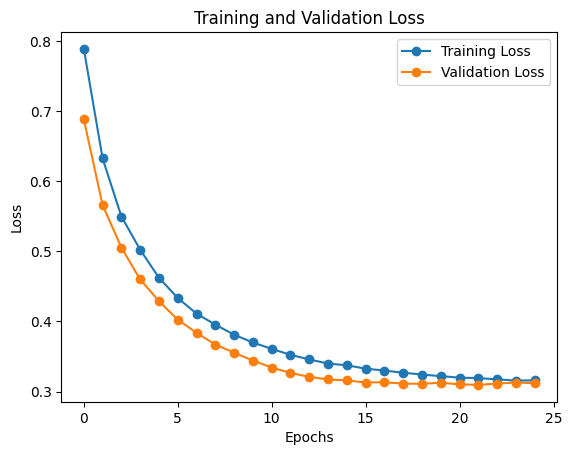

In [ ]:
# hodnoty stratovej funkcie na treningovej a testovacej mnozine
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


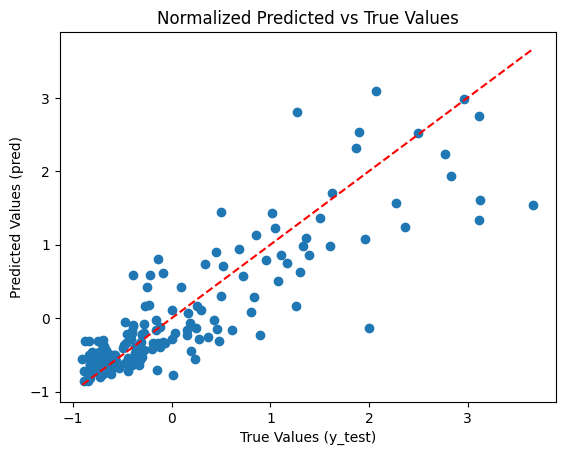

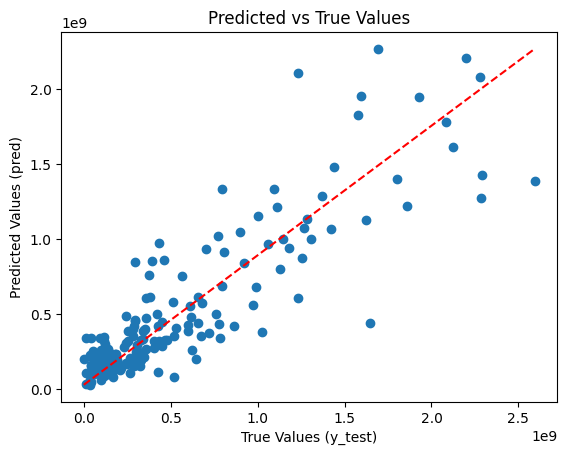

In [ ]:
# vykreslenie predikcie a skutočnosti do grafu
pred = model.predict(X_test)
pred = pred.flatten()

plt.scatter(y_test, pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (pred)')
plt.title('Normalized Predicted vs True Values')
plt.show()

# prevod na pôvodné hodnoty (opačná operácia k normalizácii)
streams_pred_actual = (pred * streams_std) + streams_mean
streams_actual = (y_test * streams_std) + streams_mean

plt.scatter(streams_actual, streams_pred_actual)
plt.plot([min(streams_actual), max(streams_actual)], [min(streams_pred_actual), max(streams_pred_actual)], color='red', linestyle='--')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (pred)')
plt.title('Predicted vs True Values')
plt.show()

**Model neurónovej siete pre kategoriálnu premennú**

In [ ]:
# tu bude musiet mat aktivacnu funkciu na konci
y = df_final['mode_Major'] # predikovana premenna
X = df_final.drop(['mode_Major', 'mode_Minor'], axis=1) # ostatne data


# architektura modelu
model = Sequential()
model.add(layers.Input(shape=(X.shape[1],))) #  vstup
# skryte vrstvy
model.add(layers.Dense(32), 'relu')
model.add(layers.Dense(64), 'relu')
model.add(layers.Dense(32), 'relu')

# vystup pre binárnu klasifikáciu
model.add(layers.Dense(1, activation='sigmoid'))

# kompilovať model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model aplikovany na data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5998 - loss: 0.6550 - val_accuracy: 0.6000 - val_loss: 0.6772
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6114 - loss: 0.6513 - val_accuracy: 0.6000 - val_loss: 0.6767
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6236 - loss: 0.6553 - val_accuracy: 0.6053 - val_loss: 0.6757
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6261 - loss: 0.6431 - val_accuracy: 0.5895 - val_loss: 0.6787
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6216 - loss: 0.6484 - val_accuracy: 0.5947 - val_loss: 0.6745
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6348 - loss: 0.6439 - val_accuracy: 0.5947 - val_loss: 0.6741
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5966 - loss: 0.6561 - val_accuracy: 0.6000 - val_loss: 0.6739
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6567 - loss: 0.6333 - val_accuracy: 0.5895 - val_loss:

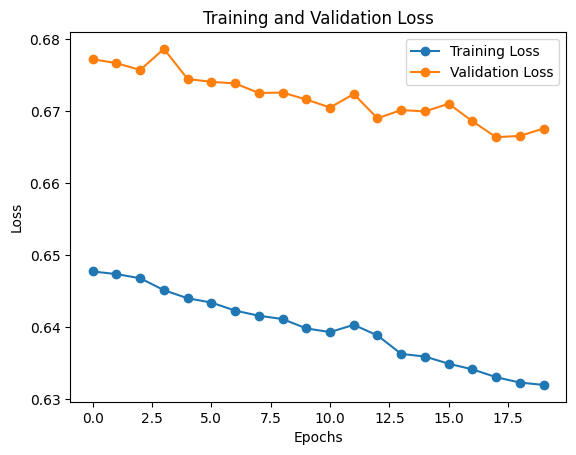

In [ ]:
# hodnoty stratovej funkcie na treningovej a testovacej mnozine
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


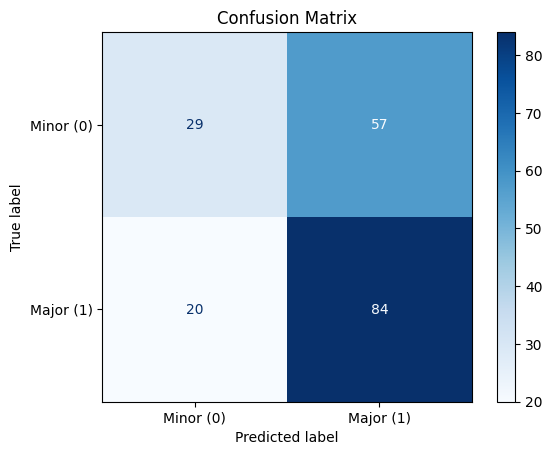

In [ ]:
# vizualizacia spravnosti modelu na testovacej mnozine
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(X_test)  # get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # convert to binary (threshold = 0.5)
cm = confusion_matrix(y_test, y_pred)

# vykreslenie matice zámeny
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Minor (0)", "Major (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()